In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
data = pd.read_csv('data/gamedev_abtest.csv')
data.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [3]:
data.describe()

,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
count,6.968400e+05,696840.000000,6.968400e+05,696840.0,696840.0,45412.000000,168193.000000
mean,2.448543e+06,426.099963,1.485821e+05,0.0,0.0,1992.865322,936.481899
std,1.210664e+08,434.405962,1.764010e+07,0.0,0.0,3895.541280,3522.989145
min,-2.128381e+09,-1.000000,0.000000e+00,0.0,0.0,500.000000,100.000000
25%,3.314100e+04,59.000000,3.700000e+01,0.0,0.0,500.000000,500.000000
50%,1.729600e+05,245.000000,5.200000e+01,0.0,0.0,1000.000000,600.000000
75%,5.094630e+05,735.000000,7.300000e+01,0.0,0.0,2400.000000,1000.000000
max,2.139124e+09,1299.000000,2.123448e+09,0.0,0.0,189600.000000,755950.000000


In [4]:
data.groupby('AbGroup')['user_id'].agg(['count', 'nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


In [5]:
data['AbGroup'].value_counts(normalize=True)

AbGroup
Control    0.800858
Test       0.199142
Name: proportion, dtype: float64

In [6]:
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format = '%Y-%m-%d')
data['install_date'] = pd.to_datetime(data['install_date'], format = '%Y-%m-%d')

In [7]:
data.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


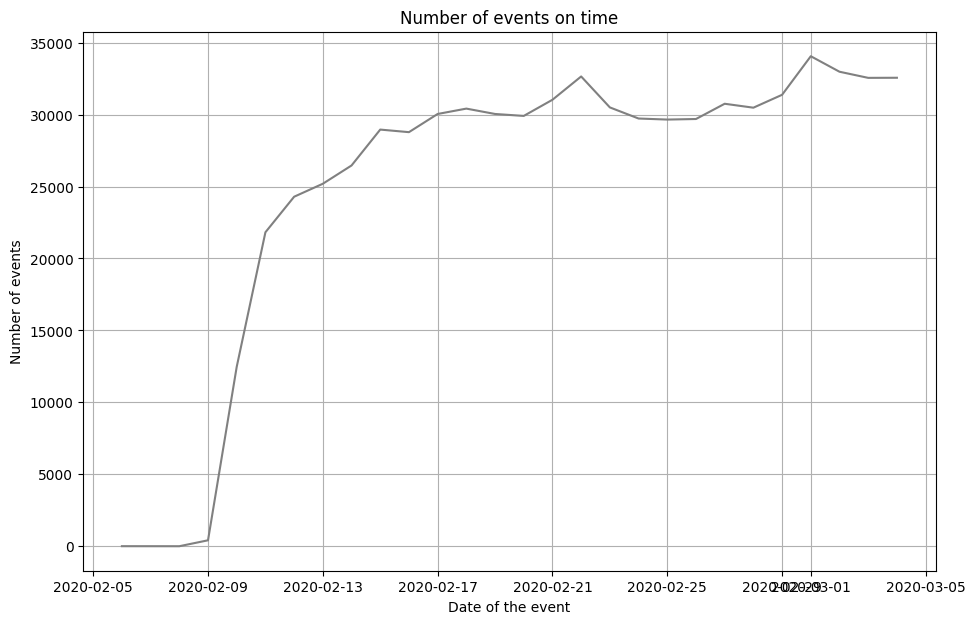

In [8]:
plt.figure(figsize=(11, 7))
plt.plot(data.groupby('time_stamp')['user_id'].count(), color='gray')
plt.xlabel('Date of the event')
plt.ylabel('Number of events')
plt.title('Number of events on time')
plt.grid(True)
plt.show()

The testing took 1 month

In [9]:
data.groupby('time_stamp')['user_id'].agg(['count', 'nunique'])

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


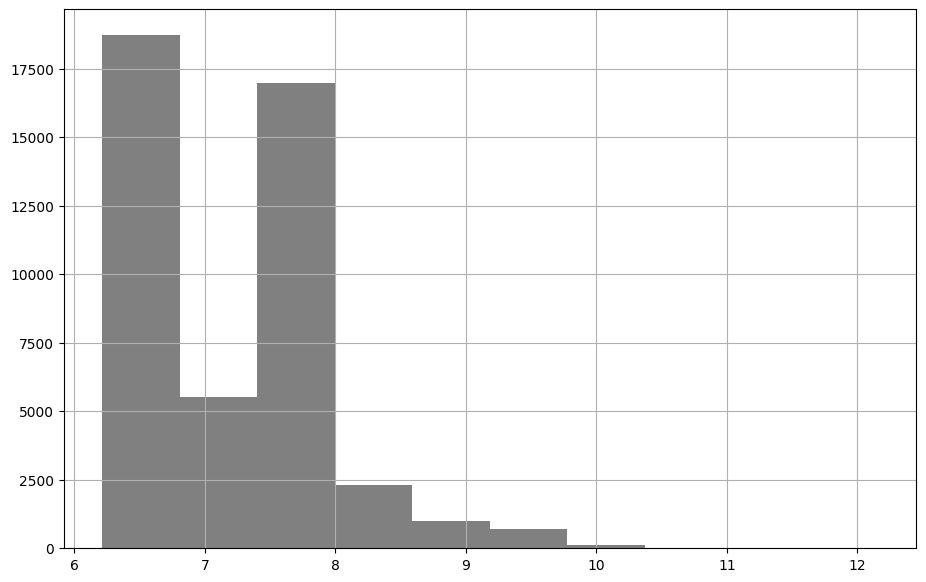

In [10]:
plt.figure(figsize=(11, 7))
plt.hist(np.log(data['gold_on_event']), color='gray')
plt.grid(True)
plt.show()

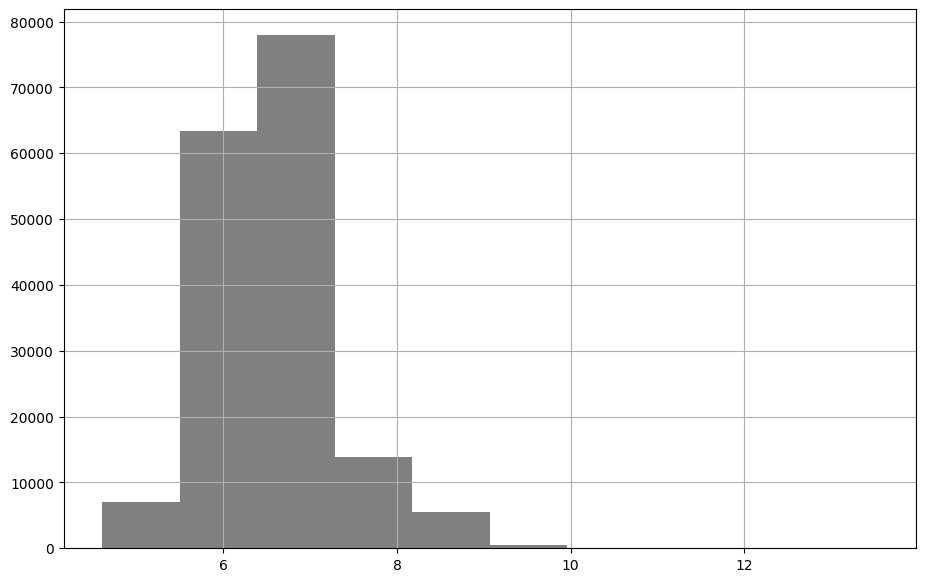

In [11]:
plt.figure(figsize=(11, 7))
plt.hist(np.log(data['gold_on_other_activities']), color='gray')
plt.grid(True)
plt.show()

In [12]:
data['gold_on_event_binary'] = (data['gold_on_event'] > 0)*1

In [13]:
data['gold_on_other_activities_binary'] = (data['gold_on_other_activities'] > 0)*1

In [14]:
data.head(10)

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities,gold_on_event_binary,gold_on_other_activities_binary
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN,0,0
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN,0,0
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN,0,0
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN,0,0
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN,1,0
5,Control,203a74059afce17b1ae5e19cab1147faf8d20010,2020-02-21,2019-01-22,ResourceSpend,itunes,Paid,France,361720,1193,30.0,0.0,0.0,NaN,NaN,0,0
6,Control,faba7453a9c06c9e1bd039057cf4b72a36ee55a8,2020-02-28,2019-09-09,ResourceSpend,itunes,Paid,Germany,744718,893,29.0,0.0,0.0,NaN,NaN,0,0
7,Test,a7e62ccfa04fd4a7efe873987fae2661b5c718ec,2020-02-11,2019-09-17,ResourceSpend,itunes,Paid,United Kingdom of Great Britain and Northern I...,1340154,934,32.0,0.0,0.0,NaN,1200.0,0,1
8,Control,d07eda72e9d914f6bfc9681ca86790374ebf224b,2020-02-11,2018-11-07,ResourceSpend,itunes,Paid,Canada,1192713,1299,50.0,0.0,0.0,NaN,NaN,0,0
9,Test,5244b5e9c2321e294bfffb3a07290a2437be19cc,2020-02-13,2019-04-23,ResourceSpend,itunes,Paid,Germany,136307,277,93.0,0.0,0.0,NaN,NaN,0,0


In [38]:
data_agg = (data.groupby('AbGroup')
 [['gold_on_event_binary', 
   'gold_on_event', 
   'gold_on_other_activities_binary', 
   'gold_on_other_activities']].agg({'gold_on_event_binary': ['mean', 'count'],
                                    'gold_on_event': ['mean', 'count', 'median'],
                                    'gold_on_other_activities_binary': ['mean', 'count'],
                                    'gold_on_other_activities': ['mean', 'count', 'median']}))

In [39]:
data_agg.columns = ['_'.join(col) for col in data_agg.columns]
data_agg

,gold_on_event_binary_mean,gold_on_event_binary_count,gold_on_event_mean,gold_on_event_count,gold_on_event_median,gold_on_other_activities_binary_mean,gold_on_other_activities_binary_count,gold_on_other_activities_mean,gold_on_other_activities_count,gold_on_other_activities_median
AbGroup,,,,,,,,,,
Control,0.06523,558070,1965.211658,36403,1000.0,0.241385,558070,911.892213,134710,600.0
Test,0.06492,138770,2104.606505,9009,1500.0,0.241284,138770,1035.412000,33483,600.0


In [23]:
un_us = data.groupby('user_id')['AbGroup'].nunique().reset_index()

In [25]:
un_us[un_us['AbGroup']>1]

,user_id,AbGroup
202,007a61c7cc84aa559280c6d222aa3e15cb5e0114,2
208,007c891d5eb34c1398966a836d74a123452384de,2
895,02125379d8faf43debf755edfb32758ea5d789d8,2
1097,028e3fc09324ac6df71fccf432dabe44e476956c,2
1107,02977b73d35305fc135ea01bfcc9e1aa334d480a,2
...,...,...
110097,fe08c305b0317eecc6b5cf3cc5362fc912afdc0b,2
110362,fea60891a7ef95c7b95a0b1e58cb9d755684b3de,2
110480,fef449646b98d04def88b9ddb45e7c43bd9a278a,2
110515,ff079e7288b379b4e47650da302a5cc23e8c7ad3,2


In [36]:
data_agg2 = (data.groupby(['user_id', 'AbGroup'])[['gold_on_event_binary',
                                    'gold_on_event',
                                    'gold_on_other_activities_binary',
                                    'gold_on_other_activities']].agg({'gold_on_event_binary': ['mean', 'count'],
                                    'gold_on_event': ['mean', 'count', 'median'],
                                    'gold_on_other_activities_binary': ['mean', 'count'],
                                    'gold_on_other_activities': ['mean', 'count', 'median']}))

In [37]:
data_agg2.columns = ['_'.join(col) for col in data_agg2.columns]
data_agg2

,,gold_on_event_binary_mean,gold_on_event_binary_count,gold_on_event_mean,gold_on_event_count,gold_on_event_median,gold_on_other_activities_binary_mean,gold_on_other_activities_binary_count,gold_on_other_activities_mean,gold_on_other_activities_count,gold_on_other_activities_median
user_id,AbGroup,,,,,,,,,,
00000d6d79ec151d74c5b0c0705d9d9fe252fe83,Control,0.000000,2,NaN,0,NaN,0.000000,2,NaN,0,NaN
000133682d2dcd90c1a9c8ca5e34a294f31af64f,Control,0.105263,19,1250.0,2,1250.0,0.263158,19,1210.0,5,500.0
0001f13b0535b174bc7e36a1846c31c7a091c4b0,Control,0.000000,11,NaN,0,NaN,0.272727,11,1000.0,3,500.0
00021d57aced59fbfaf63ba620afada82fc06ca8,Test,0.000000,13,NaN,0,NaN,0.153846,13,1500.0,2,1500.0
00027b7d34e10c17bfd4f76aa626403a2c5d1044,Test,0.000000,7,NaN,0,NaN,0.142857,7,600.0,1,600.0
...,...,...,...,...,...,...,...,...,...,...,...
fffea25b3877c861a4ebaa00e8fb9c5b96672e00,Control,0.000000,1,NaN,0,NaN,0.000000,1,NaN,0,NaN
fffeb6c54253ef0e7b0c4f38eb81a9dd9aebcb14,Control,0.000000,5,NaN,0,NaN,0.200000,5,500.0,1,500.0
ffff1964e1cb3bb0fc17c9ed440e3a6b6e6adf99,Control,0.000000,6,NaN,0,NaN,0.500000,6,700.0,3,600.0


In [42]:
data_agg2.groupby('AbGroup').agg('median')

,gold_on_event_binary_mean,gold_on_event_binary_count,gold_on_event_mean,gold_on_event_count,gold_on_event_median,gold_on_other_activities_binary_mean,gold_on_other_activities_binary_count,gold_on_other_activities_mean,gold_on_other_activities_count,gold_on_other_activities_median
AbGroup,,,,,,,,,,
Control,0.0,3.0,1850.000000,0.0,2400.0,0.105263,3.0,600.0,1.0,600.0
Test,0.0,3.0,1933.333333,0.0,2400.0,0.100000,3.0,600.0,1.0,600.0


In [46]:
data_agg2.groupby('AbGroup').agg('mean')

,gold_on_event_binary_mean,gold_on_event_binary_count,gold_on_event_mean,gold_on_event_count,gold_on_event_median,gold_on_other_activities_binary_mean,gold_on_other_activities_binary_count,gold_on_other_activities_mean,gold_on_other_activities_count,gold_on_other_activities_median
AbGroup,,,,,,,,,,
Control,0.031600,6.268055,2119.778819,0.408866,2002.976135,0.259680,6.268055,838.922745,1.513017,792.291208
Test,0.030891,6.229015,2417.938571,0.404390,2296.811371,0.259915,6.229015,912.853459,1.502963,856.212906


gold_on_event
gold_on_other_activities - These are our targets

bootstrap
null hypothesis - there are no differences

In [47]:
group_size = data['AbGroup'].value_counts().values

In [60]:
n = 2000
res = []

for _ in range(n):
    a = data.sample(group_size[0], replace = True)['gold_on_event'].median()
    b = data.sample(group_size[1], replace = True)['gold_on_event'].median()
    res.append(np.abs(a-b)>=500)

In [63]:
np.mean(res)

np.float64(0.132)

In [64]:
res_mean = []
a = 139

for _ in range(n):
    a = data.sample(group_size[0], replace = True)['gold_on_event'].mean()
    b = data.sample(group_size[1], replace = True)['gold_on_event'].mean()
    res_mean.append(np.abs(a-b)>=a)

In [65]:
np.mean(res_mean)

np.float64(0.0)

In [66]:
data['gold_on_event_zero'] = data['gold_on_event'].fillna(0)

In [69]:
data.groupby('AbGroup')['gold_on_event_zero'].mean()

AbGroup
Control    128.191087
Test       136.631837
Name: gold_on_event_zero, dtype: float64

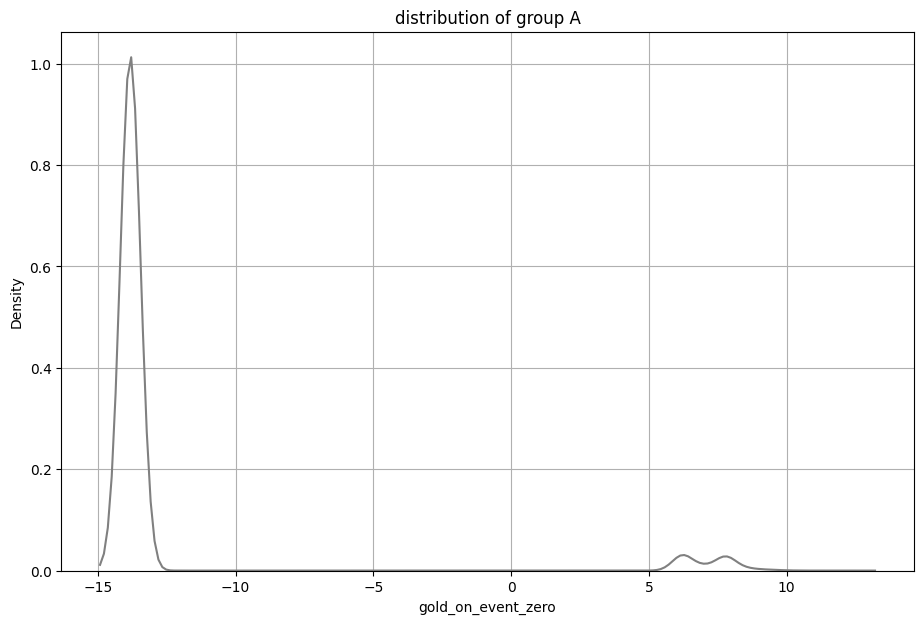

In [102]:
plt.figure(figsize=(11, 7))
sns.kdeplot(np.log(data[data['AbGroup'] == 'Control']['gold_on_event_zero'] + 1e-6), color='gray')
plt.title('distribution of group A')
plt.grid(True)
plt.show()

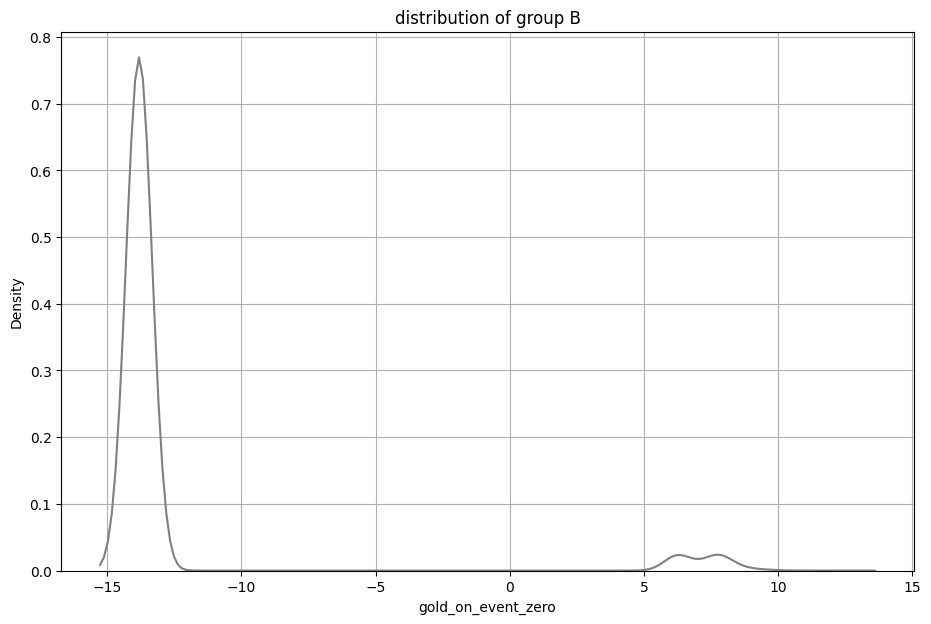

In [103]:
plt.figure(figsize=(11, 7))
sns.kdeplot(np.log(data[data['AbGroup'] == 'Test']['gold_on_event_zero'] + 1e-6), color='gray')
plt.title('distribution of group B')
plt.grid(True)
plt.show()

In [104]:
res_mean = []
a = 8

for _ in range(n):
    a = data.sample(group_size[0], replace = True)['gold_on_event'].mean()
    b = data.sample(group_size[1], replace = True)['gold_on_event'].mean()
    res_mean.append(np.abs(a-b)>=a)

In [105]:
np.mean(res_mean)

np.float64(0.0)

In [119]:
control_group_corr = data[data['AbGroup'] == 'Control']['gold_on_event_zero']
test_group_corr = data[data['AbGroup'] == 'Test']['gold_on_event_zero']
data_corr_group = pd.DataFrame({'control_group_corr': np.log(control_group_corr), 'test_group_corr': np.log(test_group_corr)})

/var/data/python/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


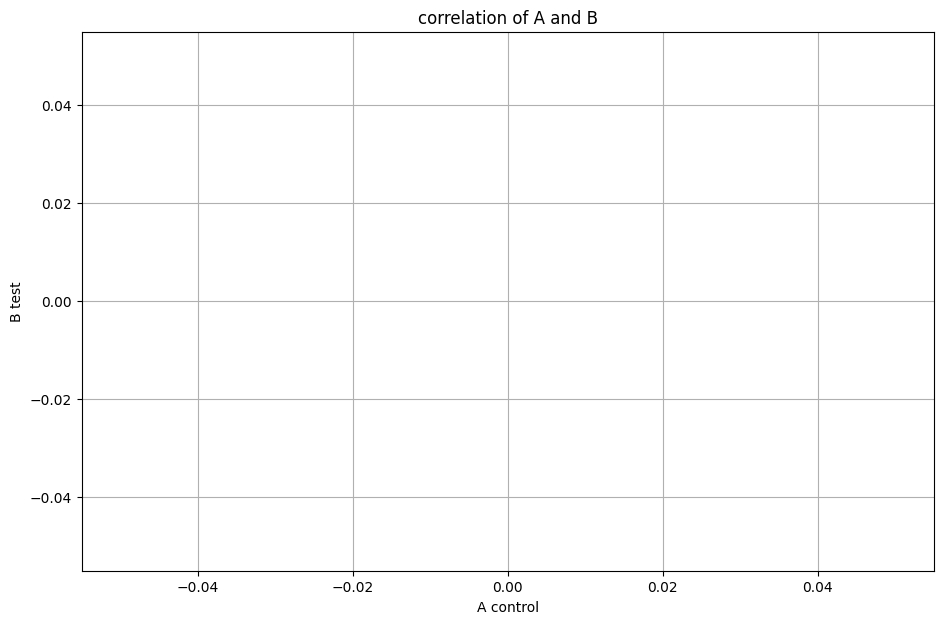

In [120]:
plt.figure(figsize=(11, 7))
sns.scatterplot(x='control_group_corr', y='test_group_corr', data=data_corr_group)
plt.title('correlation of A and B')
plt.xlabel('A control')
plt.ylabel('B test')
plt.grid(True)
plt.show()

let's try Mann Whitney, if that goes to bootstrap

In [128]:
stat, p_value = mannwhitneyu(control_group_corr, test_group_corr)
print(f'stat mw: {stat} \np_val: {p_value}')

stat mw: 38729221157.0 
p_val: 0.792841940577744


let's look at another target

In [129]:
data['gold_on_other_activities_zero'] = data['gold_on_other_activities'].fillna(0)

In [130]:
control_group_corr_other_act = data[data['AbGroup'] == 'Control']['gold_on_other_activities_zero']
test_group_corr_other_act = data[data['AbGroup'] == 'Test']['gold_on_other_activities_zero']

In [131]:
stat, p_value = mannwhitneyu(control_group_corr_other_act, test_group_corr_other_act)
print(f'stat mw: {stat} \np_val: {p_value}')

stat mw: 38700745739.5 
p_val: 0.6772962582611004


In [136]:
res_mean = []
a = 136.631837-128.191087
n = 1000

for _ in range(n):
    a = data.sample(group_size[0], replace = True)['gold_on_other_activities_zero'].mean()
    b = data.sample(group_size[1], replace = True)['gold_on_other_activities_zero'].mean()
    res_mean.append(np.abs(a-b)>=a)

In [137]:
np.mean(res_mean)

np.float64(0.0)

In [139]:
type(res_mean)

list

In [140]:
data.head()

,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities,gold_on_event_binary,gold_on_other_activities_binary,gold_on_event_zero,gold_on_other_activities_zero
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN,0,0,0.0,0.0
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN,0,0,0.0,0.0
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN,0,0,0.0,0.0
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN,0,0,0.0,0.0
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN,1,0,500.0,0.0


In [144]:
data.groupby('AbGroup')['gold_on_event_zero'].agg('mean')

AbGroup
Control    128.191087
Test       136.631837
Name: gold_on_event_zero, dtype: float64

In [145]:
data.groupby('AbGroup')['gold_on_other_activities_zero'].agg('mean')

AbGroup
Control    220.117548
Test       249.828493
Name: gold_on_other_activities_zero, dtype: float64

after this analysis, I can assume that the test group can be rolled out in production. 
In the test sample, the average indicator of targets is higher than in the control, 
while the bootstrap shows a low probability of random occurrence of such results, 
I personally tend to interpret the analysis performed this way